In [149]:
import numpy as np
import pandas as pd

from sklearn import model_selection, preprocessing

from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

In [150]:
bc_01 = pd.read_csv('base_control_agreg.csv', index_col = 0)
bc_01.head()

,Date,Num_Train,Year,Month,15zaine_jour,Sous_Ligne,Direction_Ligne,Gare_Origine,Heure_Origine,Gare_Fin,...,jour_semaine,Sens_circulation,Ligne_Presence_imposee,Montant_operation,Type_operation_CC BORD,Type_operation_CC CONTROLE,Type_operation_CC GUICHET,Type_operation_PV,nb_controleurs,nb_control
0,2019-01-01,23807,2019,1,1ere quinzaine de Janvier,Metz â Forbach-SBK,DL Lorraine,Gare de Metz-Ville,15,Gare de Forbach,...,1,0,0.0,479.7,0,0,5,4,18,9
1,2019-01-01,23816,2019,1,1ere quinzaine de Janvier,Metz â Forbach-SBK,DL Lorraine,Gare de Forbach,10,Gare de Metz-Ville,...,1,1,0.0,116.8,0,0,2,1,3,3
2,2019-01-01,88509,2019,1,1ere quinzaine de Janvier,Nancy â Metz â Lux,DL Lorraine,Gare de Nancy-Ville,11,Gare de Luxembourg,...,1,0,1.0,318.2,1,0,1,3,5,5
3,2019-01-01,88513,2019,1,1ere quinzaine de Janvier,Nancy â Metz â Lux,DL Lorraine,Gare de Nancy-Ville,13,Gare de Luxembourg,...,1,0,1.0,343.0,2,0,1,3,18,6
4,2019-01-01,88517,2019,1,1ere quinzaine de Janvier,Nancy â Metz â Lux,DL Lorraine,Gare de Nancy-Ville,15,Gare de Luxembourg,...,1,0,1.0,49.1,4,0,0,0,4,4


In [5]:
# nb de lignes, nb de colonnes
bc_01.shape

(169503, 22)

In [151]:
bc_V = bc_01.drop(['Date','15zaine_jour','Gare_Fin', 'Gare_Origine', 'Montant_operation','Type_operation_CC BORD',  'Type_operation_CC CONTROLE',
                  'Type_operation_CC GUICHET','Type_operation_PV', 'nb_controleurs' , 'Num_Train', 'cv','Year','Month'], axis =1)

In [152]:
bc_V.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169503 entries, 0 to 169502
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Sous_Ligne              169503 non-null  object 
 1   Direction_Ligne         169503 non-null  object 
 2   Heure_Origine           169503 non-null  int64  
 3   Heure_Fin               169503 non-null  int64  
 4   jour_semaine            169503 non-null  int64  
 5   Sens_circulation        169503 non-null  int64  
 6   Ligne_Presence_imposee  169503 non-null  float64
 7   nb_control              169503 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 11.6+ MB


In [153]:
bc_V['Heure_Origine'] = bc_V['Heure_Origine'].astype(object)
bc_V['Heure_Fin'] = bc_V['Heure_Fin'].astype(object)
bc_V['jour_semaine'] = bc_V['jour_semaine'].astype(object)

In [154]:
bc_V.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169503 entries, 0 to 169502
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Sous_Ligne              169503 non-null  object 
 1   Direction_Ligne         169503 non-null  object 
 2   Heure_Origine           169503 non-null  object 
 3   Heure_Fin               169503 non-null  object 
 4   jour_semaine            169503 non-null  object 
 5   Sens_circulation        169503 non-null  int64  
 6   Ligne_Presence_imposee  169503 non-null  float64
 7   nb_control              169503 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 11.6+ MB


In [155]:
# Create DataFrame 
df = pd.DataFrame(bc_V) 

for _c in df.select_dtypes(include=['object']).columns:
    print(_c)
    df[_c]  = pd.Categorical(df[_c])
    bc_T = pd.get_dummies(df)
bc_T



Sous_Ligne
Direction_Ligne
Heure_Origine
Heure_Fin
jour_semaine


,Sens_circulation,Ligne_Presence_imposee,nb_control,Sous_Ligne_Belfort â Mulhouse,Sous_Ligne_Champagne Ardenne TGV - Reims - Chalons- St Dizier,Sous_Ligne_Charleville-MÃ©ziÃ¨res â Sedan â Longwy,Sous_Ligne_ChÃ¢lons-en-Champagne â Saint-Dizier,Sous_Ligne_Epinal - Nancy - Metz,Sous_Ligne_Givet â Charleville-MÃ©ziÃ¨res,Sous_Ligne_Kruth â Mulhouse,...,Heure_Fin_21,Heure_Fin_22,Heure_Fin_23,jour_semaine_0,jour_semaine_1,jour_semaine_2,jour_semaine_3,jour_semaine_4,jour_semaine_5,jour_semaine_6
0,0,0.0,9,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0.0,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1.0,5,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1.0,6,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1.0,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169498,0,1.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
169499,1,1.0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
169500,1,1.0,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
169501,0,1.0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#Normalisation de l'ensemble des données avec preprocesssing.StandardScaler
bc_T[bc_T.columns] = pd.DataFrame(preprocessing.RobustScaler().fit_transform(bc_T))
target = bc_T['nb_control']
data = bc_T.drop(['nb_control'], axis = 1)
X = data
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 789)
#scaler = preprocessing.StandardScaler().fi

In [ ]:
#recapitulons pitulons dans un tableau les différents outils :

Cas Test/Méthodep-value

Décision Quantifieur 2 variables continues
Test de pearson < 5% Pas indépendantes
coefficient de Pearson
2 variables catégorielles

Test du khi2  < 5% Pas indépendantes
V de Cramer
variable catégorielle et continue

ANOVA < 5% Pas indépendantes

In [158]:
# ANOVA entre la variable 'nb_control' et 'Sens_circulation'
import statsmodels.api 
result = statsmodels.formula.api.ols('nb_control ~ Sens_circulation', data = bc_T).fit()
table = statsmodels.api.stats.anova_lm(result)

table

,df,sum_sq,mean_sq,F,PR(>F)
Sens_circulation,1.0,12.365949,12.365949,17.655502,0.000026
Residual,169501.0,118718.839404,0.700402,NaN,NaN


In [26]:
# ANOVA entre la variable 'nb_control' et 'Ligne_Presence_imposee'
import statsmodels.api 
result = statsmodels.formula.api.ols('nb_control ~ Ligne_Presence_imposee', data = bc_T).fit()
table = statsmodels.api.stats.anova_lm(result)

table

,df,sum_sq,mean_sq,F,PR(>F)
Ligne_Presence_imposee,1.0,177.218631,177.218631,253.376002,5.246452e-57
Residual,169501.0,118553.986721,0.699429,NaN,NaN


In [160]:
# ANOVA entre la variable 'nb_control' et 'jour_semaine_3'
import statsmodels.api 
result = statsmodels.formula.api.ols('nb_control ~ jour_semaine_3', data = bc_T).fit()
table = statsmodels.api.stats.anova_lm(result)

table

,df,sum_sq,mean_sq,F,PR(>F)
jour_semaine_3,1.0,333.173031,333.173031,476.9772,1.360093e-105
Residual,169501.0,118398.032321,0.698509,NaN,NaN


In [ ]:
#La p-value est inférieure à 5% pour les 2 tests, on rejette donc nos hypothèses de départ,
#Sens de ciruclation et ligne de presence imposée, jour de semaine_3 ont bien une  ont bien une influence sur le nombre d'opération

In [ ]:
# ensuite faire un test de chi 2 pour 2 varaibles categorielles.

In [162]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [163]:
print("ordonnée à l'origine",  lr.intercept_ )
print("pente lr.coef_", lr.coef_  )
#Ou aussi en plus wonderfull
coeffs = list(lr.coef_)
coeffs.insert(0, lr.intercept_)

feats = list(data.columns)
feats.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index = feats)

ordonnée à l'origine -435279149505.7098
pente lr.coef_ [ 5.25495135e-03 -2.00189597e-01 -3.44812879e+10  7.98492582e+10
  7.98492582e+10  7.98492582e+10 -8.52263751e+09  7.98492582e+10
 -3.44812879e+10 -3.44812879e+10 -8.52263751e+09 -8.52263751e+09
 -8.52263751e+09 -8.52263751e+09 -8.52263751e+09 -8.52263751e+09
 -8.52263751e+09 -8.52263751e+09 -8.52263751e+09 -3.44812879e+10
 -3.44812879e+10 -8.52263751e+09 -8.52263751e+09 -8.52263751e+09
 -8.52263751e+09 -8.52263751e+09 -8.52263751e+09 -8.52263751e+09
 -8.52263751e+09 -8.52263751e+09 -8.52263751e+09 -8.52263751e+09
 -3.44812879e+10  3.85026405e+10  3.85026405e+10  7.98492582e+10
  7.98492582e+10  7.98492582e+10  7.98492582e+10  7.98492582e+10
  7.98492582e+10  7.98492582e+10 -3.44812879e+10 -3.44812879e+10
 -3.44812879e+10 -3.44812879e+10 -3.44812879e+10 -3.44812879e+10
 -3.44812879e+10 -3.44812879e+10 -3.44812879e+10 -3.44812879e+10
 -3.44812879e+10 -3.44812879e+10 -8.52263751e+09 -3.44812879e+10
 -3.44812879e+10 -3.44812879e+10 -3

,valeur estimée
intercept,-4.352791e+11
Sens_circulation,5.254951e-03
Ligne_Presence_imposee,-2.001896e-01
Sous_Ligne_Belfort â Mulhouse,-3.448129e+10
Sous_Ligne_Champagne Ardenne TGV - Reims - Chalons- St Dizier,7.984926e+10
...,...
jour_semaine_2,2.591323e+11
jour_semaine_3,2.591323e+11
jour_semaine_4,2.591323e+11
jour_semaine_5,2.591323e+11


In [165]:
#Affichez le score (R²) du modèle 
#"sur l'échantillon d'apprentissage, puis le score obtenu par validation croisée, grâce à la fonction cross_val_score().
from sklearn.model_selection import cross_val_score
X = data
y  = target

#reg = LinearRegression().fit(X, y)
lr.score(X_train, y_train)
cross_val_score(lr,  X_train, y_train).mean()
#Methode plus propre
print("Coefficient de détermination du modèle :", lr.score(X_train, y_train))
print("Coefficient de détermination obtenu par Cv :", cross_val_score(lr,X_train,y_train).mean())

Coefficient de détermination du modèle : 0.1590376402707817
Coefficient de détermination obtenu par Cv : -5.242516826789247e+18


In [166]:
#Affichez le score du modèle sur l'ensemble de test.
lr.score(X_test, y_test)

0.1611237935274238

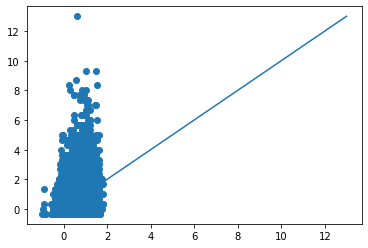

In [168]:
#Stockez les prédictions du modèle pour X_test dans pred_test et affichez dans un graphique
#le nuage de points entre pred_test et y_test, en ajoutant la droite d'équation  y=xy=x .
#Si les prédictions sont bonnes, les points devraient être proches de cette droite.

pred_test = lr.predict(X_test)
plt.scatter(pred_test, y_test)
plt.plot((y_test.min(),y_test.max()), (y_test.min(),y_test.max()))
plt.show()

count    135602.000000
mean         -0.000040
std           0.769156
min         -12.953634
25%          -0.293355
50%           0.164459
75%           0.474915
max           2.131490
Name: nb_control, dtype: float64


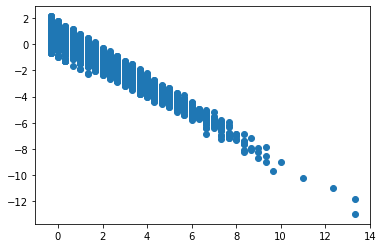

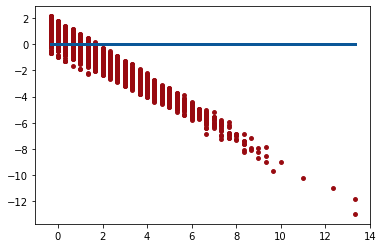

In [170]:
#Calculer les valeurs ajustées (pred_train) puis les résidus (residus) du modèle.
#Afficher le nuage des points représentants les résidus en fonction des valeurs de y_train.
pred_train = lr.predict(X_train)

residus = pred_train - y_train

plt.scatter( y_train, residus )
print(residus.describe())
plt.show()
# en plus  wonderfull
plt.scatter(y_train, residus, color = '#980a10', s=15)
print(plt.plot((y_train.min(),y_train.max()), (0,0), lw=3, color = '#0a5798'))
plt.show()

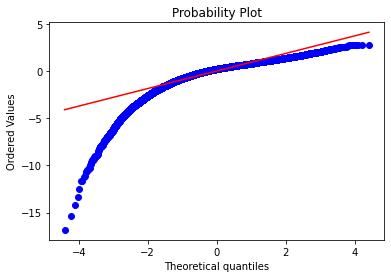

In [171]:
from  scipy.stats import  probplot

import statsmodels.api as sm
import scipy.stats as stats
residus_norm = (residus-residus.mean())/residus.std()

stats.probplot(residus_norm, plot=plt)

plt.show()


In [37]:
signif_features = bc_T.columns.drop([])

Index(['Sens_circulation', 'Ligne_Presence_imposee', 'nb_control',
       'Sous_Ligne_Belfort â Mulhouse ',
       'Sous_Ligne_Champagne Ardenne TGV - Reims - Chalons- St Dizier',
       'Sous_Ligne_Charleville-MÃ©ziÃ¨res â Sedan â Longwy',
       'Sous_Ligne_ChÃ¢lons-en-Champagne â Saint-Dizier',
       'Sous_Ligne_Epinal - Nancy - Metz',
       'Sous_Ligne_Givet â Charleville-MÃ©ziÃ¨res',
       'Sous_Ligne_Kruth â Mulhouse ',
       ...
       'Heure_Fin_21', 'Heure_Fin_22', 'Heure_Fin_23', 'jour_semaine_0',
       'jour_semaine_1', 'jour_semaine_2', 'jour_semaine_3', 'jour_semaine_4',
       'jour_semaine_5', 'jour_semaine_6'],
      dtype='object', length=112)

In [189]:
from  sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

sk = SelectKBest(f_regression,  k=18)
sk.fit(data, target)
data.columns[sk.get_support()]



Index(['Sous_Ligne_Belfort â Mulhouse ',
       'Sous_Ligne_Nancy â PontâSaintâVincent â ContrexÃ©ville',
       'Sous_Ligne_Nancy â Ãpinal â Remiremont',
       'Sous_Ligne_Paris Est â St-Dizier/Strasbourg',
       'Sous_Ligne_Paris Est â Troyes - Mulhouse',
       'Sous_Ligne_Reims â Fismes â La FertÃ©-Milon â Paris-Est',
       'Sous_Ligne_Sarrebourg â Strasbourg ',
       'Sous_Ligne_Strasbourg â Mulhouse ',
       'Sous_Ligne_Strasbourg â SÃ©lestat â Colmar â Mulhouse ',
       'Sous_Ligne_TERÂ Strasbourg-Mulhouse-BÃ¢le',
       'Direction_Ligne_DL Champagne Ardenne', 'Direction_Ligne_DL Lorraine',
       'Direction_Ligne_DL Paris Grand Est', 'Heure_Origine_6', 'Heure_Fin_7',
       'Heure_Fin_8', 'jour_semaine_5', 'jour_semaine_6'],
      dtype='object')

In [190]:

#Utilisez la méthode transform du sélecteur sk pour 
#créer les tableaux sk_train et sk_test à partir de X_train et X_test.
sk_train = sk.transform(X_train)
sk_test = sk.transform(X_test)


In [191]:
#Créez un modèle de régression linéaire à partir de sk_train et y_train.
#Affichez le score du modèle sur l'échantillon d'entraînement ainsi que sur sk_test.

sk_reg = LinearRegression ()
lr.fit(X_train, y_train)
sk_reg.fit(sk_train, y_train)
sk_reg.score(sk_test, y_test)


0.1174387431330749

In [194]:
#sélectionnées par sfm dans sfm_train et celles de X_test_scaled dans sfm_test, grâce à la méthode transform.

from sklearn.feature_selection import SelectFromModel

lr = LinearRegression()

sfm = SelectFromModel(lr)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

sfm_train = sfm.fit_transform(X_train_scaled, y_train)

sfm_test = sfm.transform(X_test_scaled)



In [195]:
#Affichez les nom des colonnes sélectionnés par sfm , grâce à la méthode get_support.
data.columns[sfm.get_support()]


# In[66]:


sfmlr = LinearRegression()
sfmlr.fit(sfm_train, y_train)

print(sfmlr.score(sfm_train, y_train))
print(sfmlr.score(sfm_test, y_test))


0.08592891698457528
0.087899019705452


# REGRESSion ridge lasso


In [178]:
from sklearn.linear_model import RidgeCV
params = {"alpha ": (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100) }
              
ridge_reg = RidgeCV(alphas = [0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100], fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False).fit(X_train, y_train)

In [179]:
print(ridge_reg.alpha_)
print(ridge_reg.score(X_train, y_train))
print(ridge_reg.score(X_test, y_test))

1.0
0.15906540568750493
0.16109782552619023


In [180]:
print( "alpha sélectionné par c-v :" ,ridge_reg.alpha_)
print("score train :", ridge_reg.score(X_train, y_train))
print("score test :", ridge_reg.score(X_test, y_test))

alpha sélectionné par c-v : 1.0
score train : 0.15906540568750493
score test : 0.16109782552619023


In [181]:
#l'erreur quadratique moyenne de prédiction
#pour ridge_pred_train et ridge_pred_test, grâce à la fonction mean_squarred_error.
ridge_pred_train = ridge_reg.predict(X_train)
ridge_pred_test = ridge_reg.predict(X_test)
print("rmse ridge_pred_train:", np.sqrt(mean_squared_error(y_train, ridge_pred_train)))
print("rmse ridge_pred_test: ", np.sqrt(mean_squared_error(y_test, ridge_pred_test )))

rmse ridge_pred_train: 0.7691402914461655
rmse ridge_pred_test:  0.75994100412168


In [182]:
# lasso_reg, avec  α=0.1α=0.1  (valeur par défaut sur scikit-learn), ajusté sur les données d'entraînement
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)

lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
#SERIES TEMPORELLES

In [56]:
bc_timeseries = pd.read_csv('base_control_agreg.csv', index_col = 'Date', parse_dates = True)
bc_timeseries.head()

,Unnamed: 0,Num_Train,Year,Month,15zaine_jour,Sous_Ligne,Direction_Ligne,Gare_Origine,Heure_Origine,Gare_Fin,...,jour_semaine,Sens_circulation,Ligne_Presence_imposee,Montant_operation,Type_operation_CC BORD,Type_operation_CC CONTROLE,Type_operation_CC GUICHET,Type_operation_PV,nb_controleurs,nb_control
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0,23807,2019,1,1ere quinzaine de Janvier,Metz â Forbach-SBK,DL Lorraine,Gare de Metz-Ville,15,Gare de Forbach,...,1,0,0.0,479.7,0,0,5,4,18,9
2019-01-01,1,23816,2019,1,1ere quinzaine de Janvier,Metz â Forbach-SBK,DL Lorraine,Gare de Forbach,10,Gare de Metz-Ville,...,1,1,0.0,116.8,0,0,2,1,3,3
2019-01-01,2,88509,2019,1,1ere quinzaine de Janvier,Nancy â Metz â Lux,DL Lorraine,Gare de Nancy-Ville,11,Gare de Luxembourg,...,1,0,1.0,318.2,1,0,1,3,5,5
2019-01-01,3,88513,2019,1,1ere quinzaine de Janvier,Nancy â Metz â Lux,DL Lorraine,Gare de Nancy-Ville,13,Gare de Luxembourg,...,1,0,1.0,343.0,2,0,1,3,18,6
2019-01-01,4,88517,2019,1,1ere quinzaine de Janvier,Nancy â Metz â Lux,DL Lorraine,Gare de Nancy-Ville,15,Gare de Luxembourg,...,1,0,1.0,49.1,4,0,0,0,4,4


In [57]:
bc_timeseries = bc_timeseries.drop(['Unnamed: 0'], axis = 1)

In [59]:
bc_timeseries.index

DatetimeIndex(['2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-01-01',
               ...
               '2020-12-31', '2020-12-31', '2020-12-31', '2020-12-31',
               '2020-12-31', '2020-12-31', '2020-12-31', '2020-12-31',
               '2020-12-31', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=169503, freq=None)

In [ ]:
bc_timeseries = bc_timeseries.drop(['Num_Train','15zaine_jour','Gare_Fin', 'Gare_Origine', 'Montant_operation','Type_operation_CC BORD',  'Type_operation_CC CONTROLE',
                  'Type_operation_CC GUICHET','Type_operation_PV', 'nb_controleurs' , 'cv','Month','Direction_Ligne','Heure_Origine','Heure_Fin','Year'], axis =1)


In [108]:
bc_timeseries.shape


(169503, 71)

In [109]:

# Create DataFrame 
df = pd.DataFrame(bc_timeseries) 

for _c in df.select_dtypes(include=['object']).columns:
    print(_c)
    df[_c]  = pd.Categorical(df[_c])
    bc_T = pd.get_dummies(df)
bc_T



,Num_Train,Year,Heure_Origine,Heure_Fin,Sens_circulation,Ligne_Presence_imposee,nb_control,Sous_Ligne_Belfort â Mulhouse,Sous_Ligne_Champagne Ardenne TGV - Reims - Chalons- St Dizier,Sous_Ligne_Charleville-MÃ©ziÃ¨res â Sedan â Longwy,...,Sous_Ligne_Travaux,Sous_Ligne_Wissembourg â Strasbourg,Sous_Ligne_Wissembourg-Neustadt et Lauterbourg-Woerth,jour_semaine_0,jour_semaine_1,jour_semaine_2,jour_semaine_3,jour_semaine_4,jour_semaine_5,jour_semaine_6
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,23807,2019,15,16,0,0.0,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2019-01-01,23816,2019,10,11,1,0.0,3,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2019-01-01,88509,2019,11,13,0,1.0,5,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2019-01-01,88513,2019,13,15,0,1.0,6,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2019-01-01,88517,2019,15,17,0,1.0,4,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,839551,2020,6,11,0,1.0,4,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-12-31,839552,2020,7,12,1,1.0,8,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-12-31,839556,2020,15,20,1,1.0,16,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [110]:
bc_timeseries = bc_T.drop(['Num_Train', 'Year'], 1)
bc_timeseries.shape

(169503, 69)

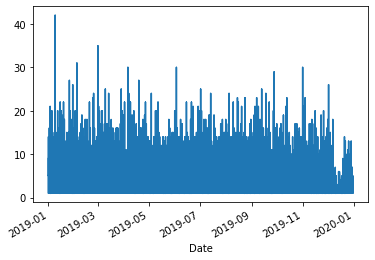

In [114]:
bc_timeseries['2019']['nb_control'].plot()
plt.show()

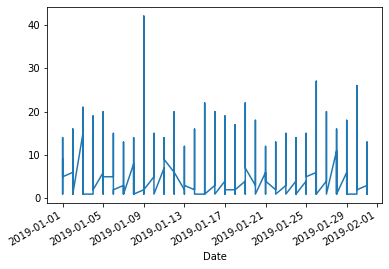

In [115]:
bc_timeseries['2019-01']['nb_control'].plot()
plt.show()

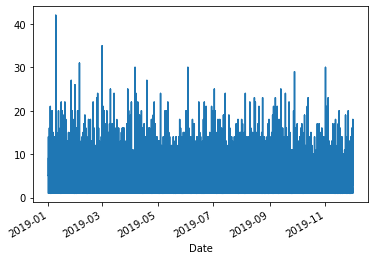

In [116]:
bc_timeseries['2019-01-01':'2019-12-01']['nb_control'].plot()
plt.show()

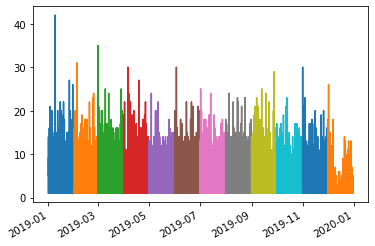

In [117]:
bc_timeseries.loc['2019','nb_control'].resample('M').plot()
plt.show()
# le regroupage des données selon une frequence, nous constatons que pour ce mois de  janv et nov  ont une frequence similaire

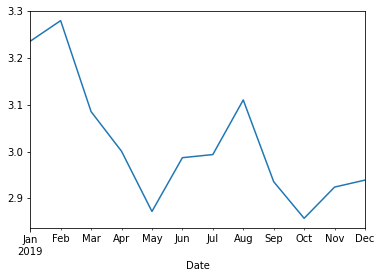

In [119]:
bc_timeseries.loc['2019','nb_control'].resample('M').mean().plot()
plt.show()
# un pic élevé de la moyenne  nb control   pour le mois de fev et Août avec une tendance centrale horizontale pour le reste de mois

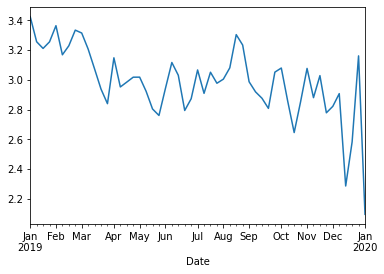

In [120]:
bc_timeseries.loc['2019','nb_control'].resample('W').mean().plot()
plt.show()
#Pour les semaines du mois de fev et Aout et septembre on a un pic croissant assez interessant de même pour la semaine du  mois d'aout

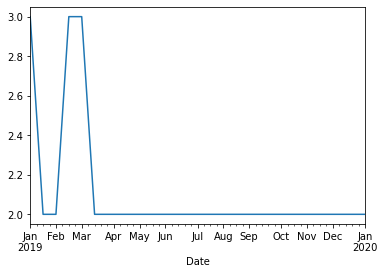

In [122]:
bc_timeseries.loc['2019','nb_control'].resample('2W').median().plot()
plt.show()
#Pour les quinzaines on retrouve à nouveau  ce pic  croissant consequent pour les quinzaine du mois de fev et mars

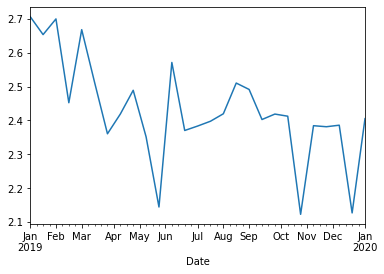

In [28]:
bc_timeseries.loc['2019','nb_control'].resample('2W').std().plot()
plt.show()
#Pour la volatilité  avec le std on constate une decorissance au fil des 15 zaines

In [32]:
bc_timeseries.loc['2019','nb_control'].resample('W').agg(['mean', 'std','min','max'])

#L'analyse de la  volatilité du nb control  en terme de moyenne, min et max selon les date

,mean,std,min,max
Date,,,,
2019-01-06,3.424422,2.706723,1,21
2019-01-13,3.255619,2.710270,1,42
2019-01-20,3.210707,2.597897,1,22
2019-01-27,3.254930,2.599506,1,27
2019-02-03,3.363636,2.793842,1,26
2019-02-10,3.167914,2.457759,1,31
2019-02-17,3.228557,2.446960,1,18
2019-02-24,3.333793,2.598179,1,24
2019-03-03,3.314273,2.734698,1,35


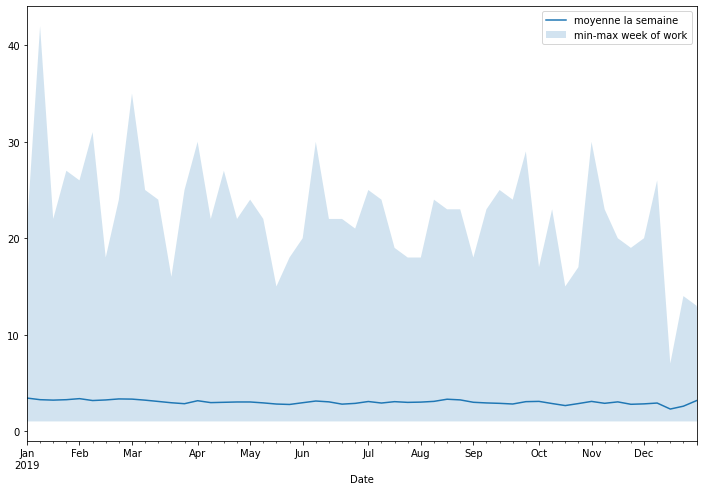

In [123]:
sem = bc_timeseries.loc['2019','nb_control'].resample('W').agg(['mean', 'std','min','max'])
plt.figure(figsize= (12, 8))
sem['mean']['2019'].plot(label= 'moyenne la semaine ')
plt.fill_between(sem.index, sem['max'], sem['min'], alpha = 0.2, label= 'min-max week of work')
plt.legend()
plt.show()

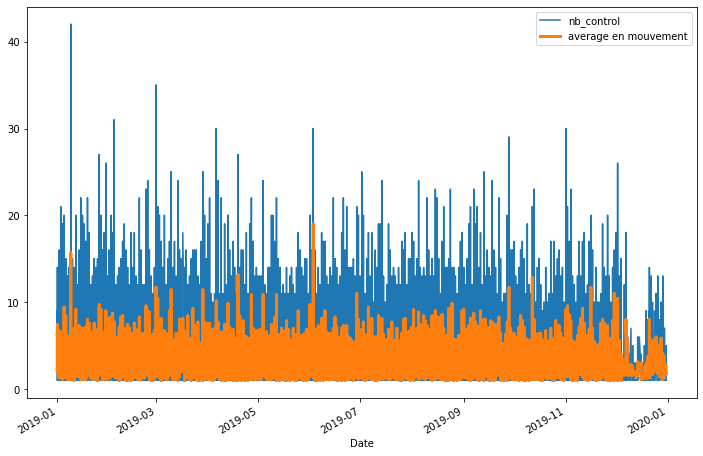

In [124]:
plt.figure(figsize= (12, 8))
bc_timeseries.loc['2019','nb_control'].plot()
bc_timeseries.loc['2019','nb_control'].rolling(window= 7).mean().plot(label = 'average en mouvement', lw = 3)
plt.legend()
plt.show()

In [ ]:
#Une série temporelle Y_t (t=1,2...) est dite stationnaire (au sens faible)
#si ses propriétés statistiques ne varient pas dans le temps (espérance, variance, auto-corrélation). 
#Un exemple de série temporaire stationnaire est le bruit blanc, par exemple une série où la loi de Y_t est une loi normale N(mu, sigma^2) indépendante de t. Un exemple de série non-stationnaire est la marche aléatoire. La marche aléatoire est un exemple de processus présentant une racine unitaire 
#car elle peut être décrite par un processus auto-régressif d'ordre 1 dont le coefficient est égal à 1.
#Tests ADF et KPSS pour vérifier la stationnarité;
#tatistiques de test
#Je vais montrer deux tests statistiques différents. Le premier est le test Augmented Dick-Fuller (ADF)
#dont l'hypothèse nulle est la présence d'une racine unitaire dans l'échantillon de la série temporelle par rapport à l'alternative de stationnarité ou de tendance-stationnarité. 
#Le deuxième test est le test de Kwiatkowski-Phillips-Schmidt-Shin (KPSS) dont l'hypothèse nulle est la stationnarité (ou tendance-stationnarité) par rapport à l'alternative de la présence de racine unitaire.
#En fait,  "Test de l'hypothèse nulle de stationnarité par rapport à l'alternative de racine unitaire", 
#
#il convient d'effectuer les deux types de test afin de caractériser pleinement une série chronologique. 
#Dans le cas des méthodes choisies dans cet article, une forte probabilité de stationnarité dans l'échantillon d'une série chronologique résultera des cas 
#dans lesquels l'hypothèse nulle est rejetée dans le test ADF mais acceptée dans le test KPSS.

In [ ]:
#Et les tests de racine unitaire comme le test de Dickey-Fuller, le test augmenté de Dickey-Fuller (ADF), 
H0: La serie comporte une racine unitaire
h1:La serie ne comporte pas de racine unitaire.La serie est stationnaire

In [126]:
from statsmodels.tsa.stattools import adfuller
def perform_ADF_test(X):
    ADF_test = adfuller(X)
    print('ADF Statistic: %f' % ADF_test[0])
    print('p-value: %f' % ADF_test[1])
    print('Critical Values:')
    for key, value in ADF_test[4].items():
        print('\t%s: %.3f' % (key, value))
    
perform_ADF_test(bc_timeseries['nb_control'])

ADF Statistic: -34.810015
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [ ]:
#Etant donné que la p_value est inférieure au niveau de signification alpha =  5%
#On doit rejeter l'hypothèse nulle H0 et retenir l'hypothèse L'hypothèse alternative  H1.
#Le risque de rejeter l'hypothèse nulle alors qu'elle est  vraie est 0.00

In [ ]:
#test KPSS, pour lesquels l'hypothèse nulle
#H0 :est que la série est stationnaire

In [127]:
from statsmodels.tsa.stattools import kpss
def perform_kpss_test(X):
    kpss_test = kpss(X)    
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('lags: %f' % kpss_test[2])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))
perform_kpss_test(bc_timeseries['nb_control'])

C:\Users\INSA\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


KPSS Statistic: 1.827217
p-value: 0.010000
lags: 77.000000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\INSA\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


In [ ]:
#Etant donné que la p_value est inférieure au niveau de signification alpha =  5%
#On doit rejeter l'hypothèse nulle H0 et retenir l'hypothèse L'hypothèse alternative  H1.
#Le risque de rejeter l'hypothèse nulle alors qu'elle est  vraie est 0.00

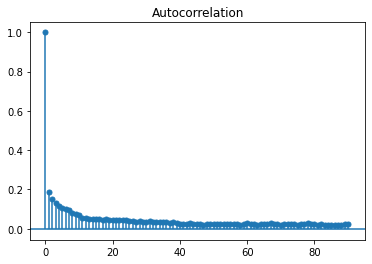

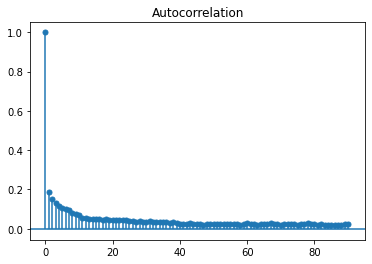

In [128]:
#ACF ET PACF
#Ce qui s'est passé les mois precedents dernière a probablement été «oublié».
#Ou peut-être au contraire. Il y a un événement périodique qui a un impact plus lourd sur les données actuelles que le reste.
#La fonction ACF est le bon outil pour répondre à ces questions.
#Jetons un coup d'œil aux données brutes du nb_control  par mois
# lags retards: nombre de `` périodes '' que vous aimeriez étudier
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(bc_timeseries['nb_control'], lags=90)


In [ ]:
#Le premier point (d'indice 0) a une hauteur 1.En fait, le premier est toujours 1. Cela a du sens car la valeur actuelle explique toujours la valeur actuelle.
#Le deuxième point est autour de 0,2 ce qui signifie que le point suivant (directement le suivant) est décrit à 90% par la valeur précédente.
#La onzième barre a une hauteur de 0,15. Cela signifie que les données actuelles auront un impact de 15% sur les données dans 11 periodes (la résolution des données est 4 semaines le mois pour toute l'année 2019).

In [129]:
bc_timeseries.to_csv("bc_timeseries.csv")

In [130]:
from pandas import read_csv
series = read_csv('bc_timeseries.csv', header=0, index_col=0)
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 169503
Training Observations: 111871
Testing Observations: 57632


Observations: 169503
Training Observations: 111871
Testing Observations: 57632


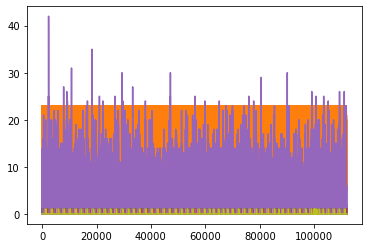

In [136]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('bc_timeseries.csv', header=0, index_col=0)
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
pyplot.plot(train)

pyplot.show()  

In [ ]:
#ARIMA